In [1]:
import numpy as np #numerical operations and working with array
import pandas as pd #to clean  and load data , explore data in table form
import matplotlib.pyplot as plt #create you all kinds of graphs
import seaborn as sns #statistical tools

In [16]:
df = pd.read_csv(r"C:\Users\shish\Desktop\cybersecurity_attacks.csv")


DATA INSEPTION

In [17]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [18]:
df.shape

(40000, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

Statistical Summary

In [20]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [22]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Drop columns with too many missing values

In [23]:
cols_to_drop = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information',
                'Firewall Logs', 'IDS/IPS Alerts']
df.drop(columns=cols_to_drop, inplace=True)

In [24]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",Firewall


In [25]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Anomaly Scores            0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Log Source                0
dtype: int64

Clean column names

In [26]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Remaining Columns:", df.columns.tolist())

Remaining Columns: ['timestamp', 'source_ip_address', 'destination_ip_address', 'source_port', 'destination_port', 'protocol', 'packet_length', 'packet_type', 'traffic_type', 'payload_data', 'anomaly_scores', 'attack_type', 'attack_signature', 'action_taken', 'severity_level', 'user_information', 'device_information', 'network_segment', 'geo-location_data', 'log_source']


Check numeric columns

In [27]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("\nNumeric Columns:", numeric_cols)



Numeric Columns: ['source_port', 'destination_port', 'packet_length', 'anomaly_scores']


Visualize distributions

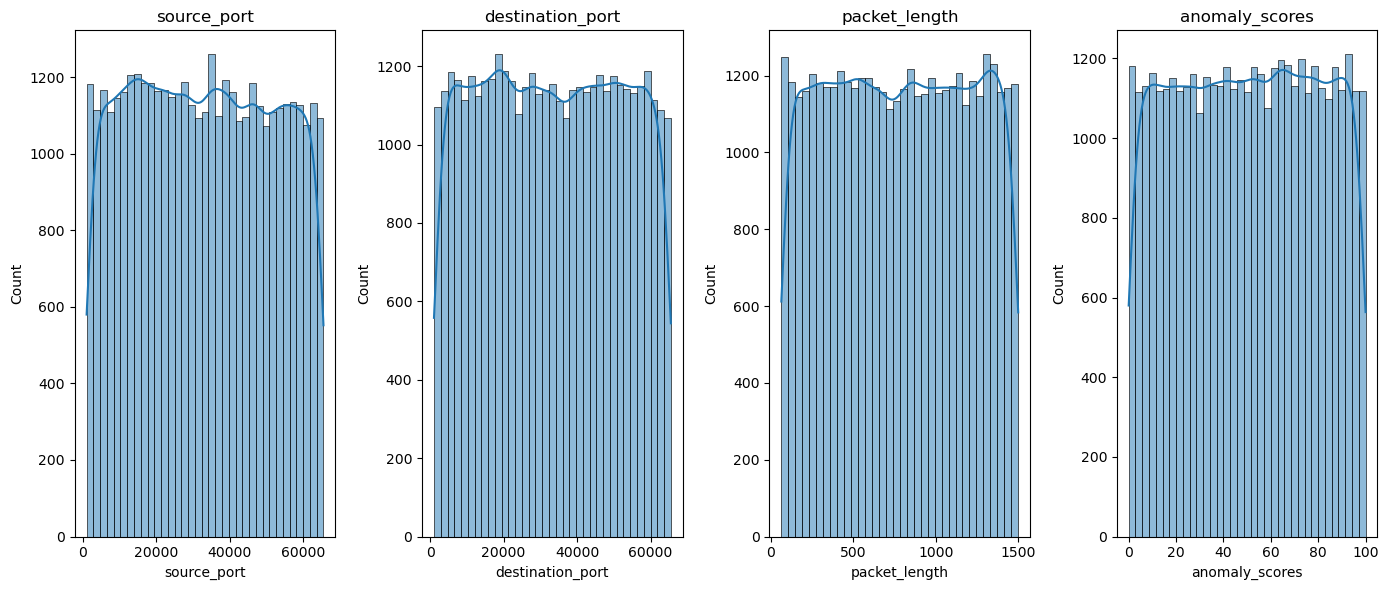

In [28]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Boxplots for All Numeric Columns

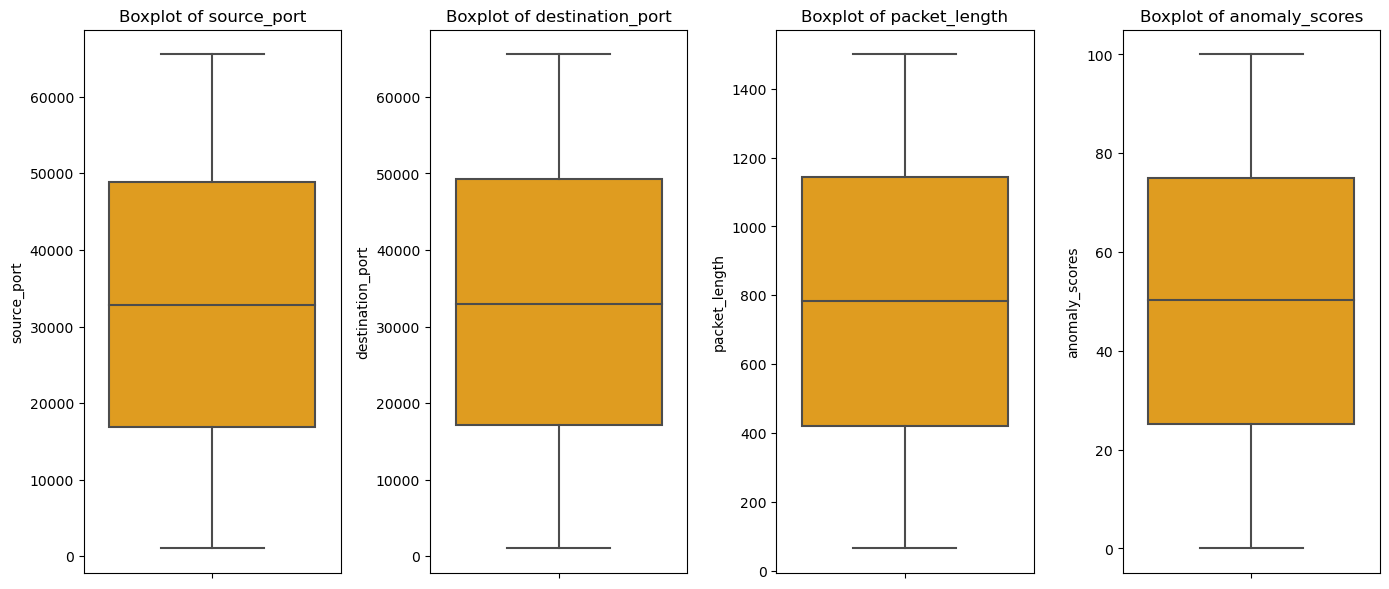

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Violin Plots

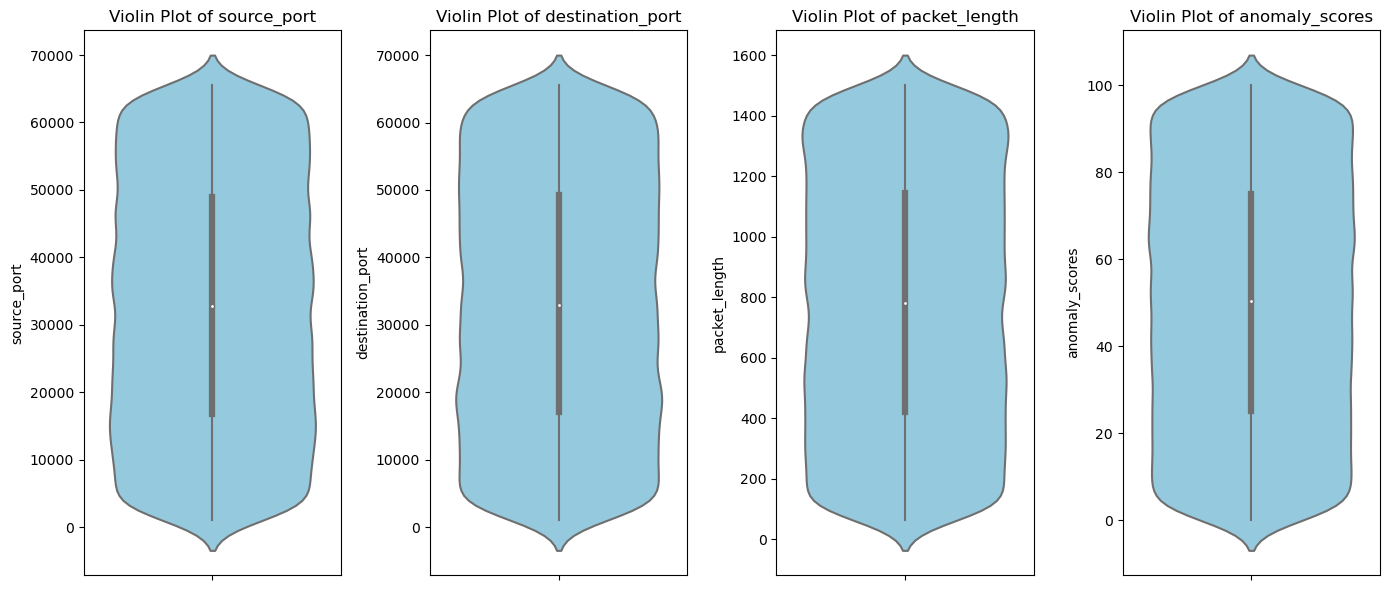

In [30]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.violinplot(y=df[col], color='skyblue')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()


Pairplot (correlation matrix with scatterplots & histograms)

C:\Users\shish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


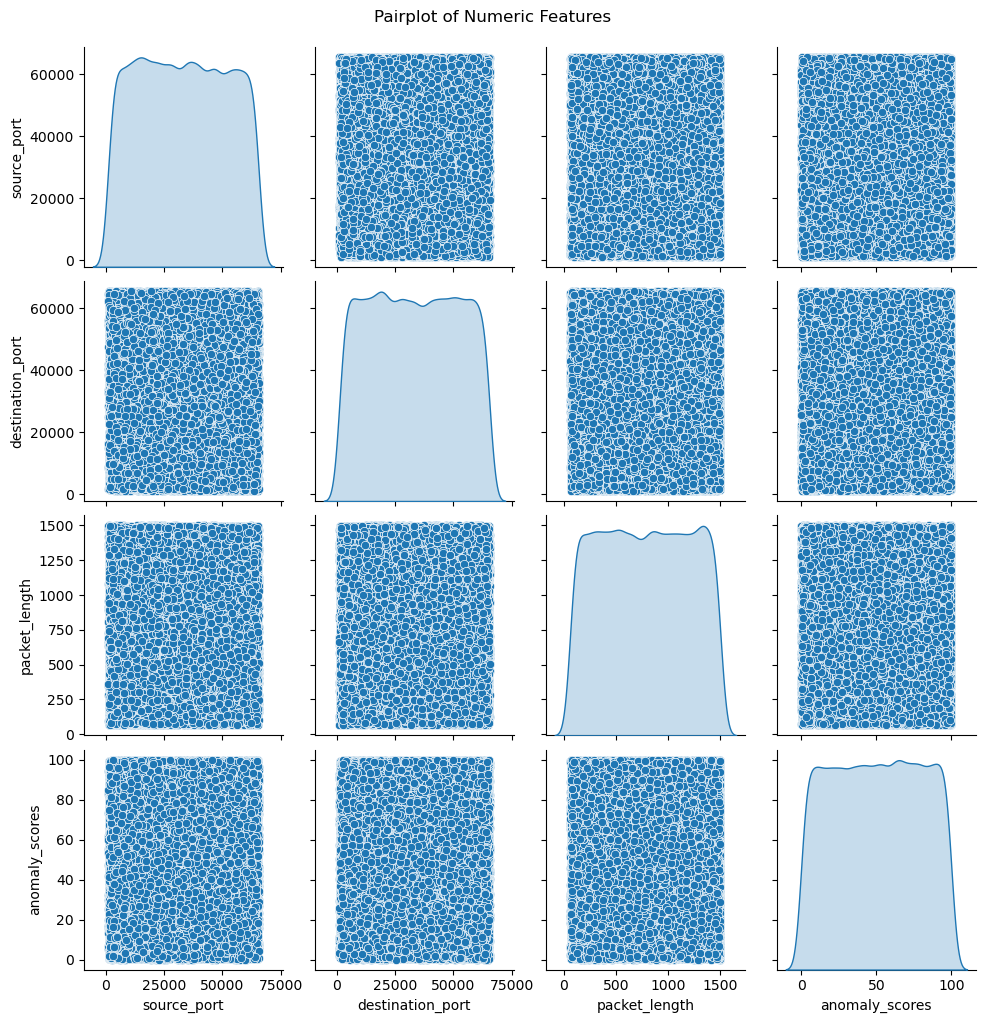

In [31]:
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


Countplot for Categorical Variables

Categorical Columns: ['timestamp', 'source_ip_address', 'destination_ip_address', 'protocol', 'packet_type', 'traffic_type', 'payload_data', 'attack_type', 'attack_signature', 'action_taken', 'severity_level', 'user_information', 'device_information', 'network_segment', 'geo-location_data', 'log_source']


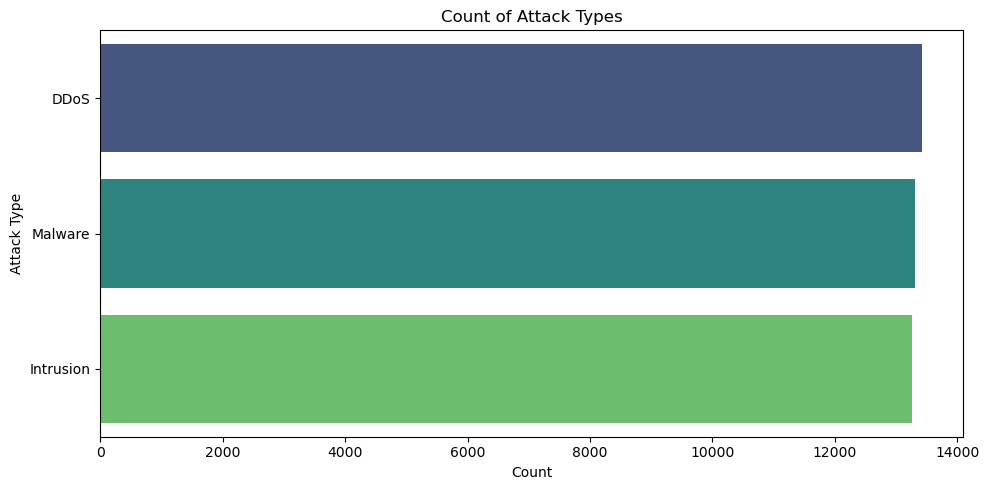

In [32]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)

# Example: Count of Attack Types
if 'attack_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['attack_type'], order=df['attack_type'].value_counts().index, palette='viridis')
    plt.title("Count of Attack Types")
    plt.xlabel("Count")
    plt.ylabel("Attack Type")
    plt.tight_layout()
    plt.show()


Correlation heatmap

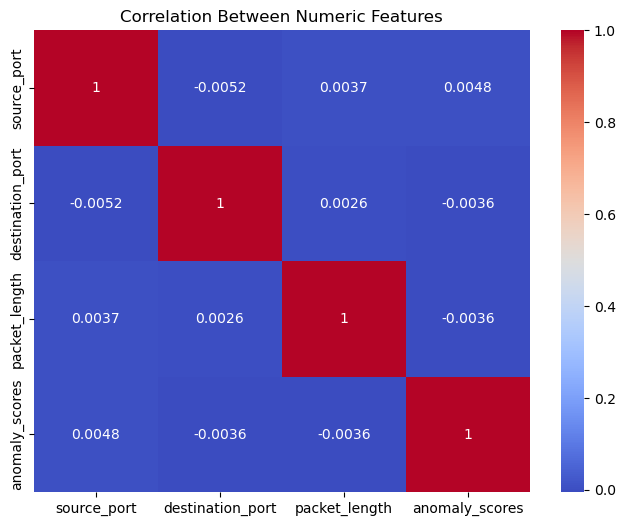

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

LINEAR REGRESSION 

In [ ]:
Choose regression target & feature

In [35]:
# Force numeric conversion
df['anomaly_scores'] = pd.to_numeric(df['anomaly_scores'], errors='coerce')
df['severity_level'] = pd.to_numeric(df['severity_level'], errors='coerce')

# Drop rows where these are NaN
df = df.dropna(subset=['anomaly_scores', 'severity_level'])

# Confirm
print(df[['anomaly_scores', 'severity_level']].dtypes)


anomaly_scores    float64
severity_level    float64
dtype: object


In [37]:
X = df[['anomaly_scores']]
y = df['severity_level']


Train-test split

In [39]:
from sklearn.model_selection import train_test_split


In [41]:
print("X shape:", X.shape)
print("y shape:", y.shape)




X shape: (0, 1)
y shape: (0,)


In [42]:
print(df[['anomaly_scores', 'severity_level']].isnull().sum())
print(df[['anomaly_scores', 'severity_level']].dropna().shape)


anomaly_scores    0.0
severity_level    0.0
dtype: float64
(0, 2)


In [47]:
df = pd.read_csv(r"C:\Users\shish\Desktop\cybersecurity_attacks.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Print raw unique values
print("Unique values in 'severity_level':")
print(df['severity_level'].unique())

print("\nUnique values in 'anomaly_scores':")
print(df['anomaly_scores'].unique())


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Print raw unique values
print("Unique values in 'severity_level':")
print(df['severity_level'].unique())

print("\nUnique values in 'anomaly_scores':")
print(df['anomaly_scores'].unique())


Unique values in 'severity_level':
['Low' 'Medium' 'High']

Unique values in 'anomaly_scores':
[28.67 51.5  87.42 ... 95.85 74.68  6.58]
Unique values in 'severity_level':
['Low' 'Medium' 'High']

Unique values in 'anomaly_scores':
[28.67 51.5  87.42 ... 95.85 74.68  6.58]


GOAL - Predict severity_level using anomaly_scores

In [48]:
from sklearn.preprocessing import LabelEncoder

# Encode severity_level: Low = 0, Medium = 1, High = 2
le = LabelEncoder()
df['severity_level_encoded'] = le.fit_transform(df['severity_level'])

print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))



Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


In [53]:
from sklearn.model_selection import train_test_split

X = df[['anomaly_scores']]
y = df['severity_level_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.32625

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.32      0.32      3934
           1       0.33      0.32      0.33      4020
           2       0.33      0.33      0.33      4046

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.33      0.33      0.33     12000


Confusion Matrix:
 [[1271 1306 1357]
 [1339 1304 1377]
 [1352 1354 1340]]
